# Learn Python Data Analytics by Example - Airline Arrival Delays

### Introduction

While working towards my Master's in Business Analytics, I found that learning by example is the best way for me to learn Python data analytics.  Being given a dataset and a set of coding tasks is much more beneficial than reading a textbook or listening to a professor.  

I want to share this method of learning with others who will also benefit.  All you need is a Python development environment (I recommend [Jupyter Notebook](https://jupyter.org/)) and a willingness to learn and have fun.

Included in this article is a list of data analytics tasks, followed by a detailed walkthrough of how to complete the tasks.  Please try to complete the tasks yourself before reading through the walkthrough - you will get more out of it that way.  Do keep in mind that there are many many ways to solve coding problems, so your code likely will not match mine word for word and that is okay.

### Project Description

For this project we will use a dataset of about 40,000 records, which represent flight arrival delays for 18 airlines in the United States.  Each row in the dataset represents a summary of delay data for a carrier-airport pair for the specified month.  The dataset was created in January 2021 and contains data from January 1, 2018 to December 31, 2019 sourced from the [Bureau of Transportation Statistics](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp).

You will need to install the [pandas](https://pandas.pydata.org/), [matplotlib](https://matplotlib.org/) and [Basemap](https://matplotlib.org/basemap/index.html) libraries, if you do not already have them.


### Data Analytics Tasks

Please perform the following tasks in Python using the *delays_2018.csv*, *delays_2019.csv* and *airport_coordinates.csv* datasets available from the [GitHub repo](https://github.com/nickdcox/learn-airline-delays).
1. Read the CSV files containing the airline delay data into a single DataFrame.  Then display the total number of rows imported.
2. Change the *date* column to date format YYYY-M (e.g. 2018-1).  Then perform exploratory data analysis on the imported dataset to identify invalid data - write code to remove the impacted rows. Finally, display the number of rows remaining.
3. Display a list of all Tennessee airports that appear in the dataset.
4. Import the coordinates dataset and merge it with the existing dataset.  Plot the coordinates of all airports on a map (hint: use Matplotlib and Basemap).
5. Display the number of diverted flights for each carrier-airport pair.
6. Display how many arrivals into JFK in 2019 encountered both weather and carrier delays?
7. Display the airline with the most flight cancellations as a percentage of total arriving flights.
8. Determine the overall average number of delays per airport.
9. Display the three carriers with the lowest number of delayed flights.
10. Request that the user input an airline. Then plot the monthly number of national air system (NAS) delay minutes for that airline.  Display whether the trend is increasing or decreasing over the last 2 months.


### Data Dictionary (*delays_2018.csv, delays_2019.csv*)

Each row in the datasets represents a summary of delay data for a carrier-airport pair for the specified month.  For example, a row may represent delay data for May 2018 for American Airlines flights arriving into JFK airport in New York City.

When multiple causes are assigned to one delayed flight, each cause is prorated based on delayed minutes it is responsible for. The numbers are rounded and may not add up to the total.


| Column Name | Description |
| :--- | :----------- |
| date | Year and month, in the format YYYY-M (e.g., 2018-1) |
| carrier | The two character designator for the carrier/airline. |
| carrier_name | The full name of the carrier/airline. |
| airport | The three character designator for the arrival airport. |
| airport_name | The full name of the arrival airport. |
| arr_flights | The total number of arriving flights for the carrier-airport pair for the month specified. |
| arr_del15 | The number of arriving flights that were delayed.  Delayed is when a flight arrives more than 15 minutes later than the scheduled arrival time. |
| carrier_ct | The number of arriving flights delayed due to a carrier issue. |
| weather_ct | The number of arriving flights delayed due to a weather issue. |
| nas_ct | The number of arriving flights delayed due to a national air system issue. |
| security_ct | The number of arriving flights delayed due to a security issue. |
| late_aircraft_ct | The number of arriving flights delayed due to an earlier late arrival of an aircraft. |
| arr_cancelled | The number of cancelled flights. |
| arr_diverted | The number of diverted flights. |
| arr_delay | The total number of delayed minutes due to delays. |
| carrier_delay | The total number of delayed minutes due to carrier issues. |
| weather_delay | The total number of delayed minutes due to weather issues. |
| nas_delay | The total number of delayed minutes due to national air system issues. |
| security_delay | The total number of delayed minutes due to security issues. |
| late_aircraft_delay | The total number of delayed minutes due to earlier later arrival of aircraft. |  

### Step 1: Read the CSV files containing the airline delay data into a single DataFrame.  Then display the total number of rows imported.

In [2]:
import pandas as pd

# Read the files and import all rows.
df_18 = pd.read_csv('delays_2018.csv')
df_19 = pd.read_csv('delays_2019.csv')

# Concatenate the 2018 and 2019 data into a single DataFrame.
df = pd.concat([df_18, df_19], ignore_index=True)

# Print out the number of rows imported from the files.
print('Number of Rows: ' + str(len(df_18) + len(df_19)))

Number of Rows: 41177


#### Code Explanation:

We start by making the contents of the pandas module available to our program.  pandas is an easy to use open source data analysis and manipulation tool, built on top of the Python programming language.  We will use it extensively throughout this project.

```
import pandas as pd
```

We import the contents of the *delays_2018.csv* file by calling the read_csv() method and store it in a DataFrame, named *df_18*.  A DataFrame is a two-dimensional data structure with labeled axes, consisting of data, rows and columns.  Think of it like a table built in Microsoft Excel or Microsoft Access.  We then repeat the same action for the *delays_2019.csv* file, naming it *df_19*.

```
df_18 = pd.read_csv('delays_2018.csv')
df_19 = pd.read_csv('delays_2019.csv')
```

To combine the two DataFrames into a single DataFrame, we call the concat() method of pandas, which is short for concatenate.  We pass two parameters: the first is a list containing the names of the two DataFrames that we want to concatenate and the second is telling pandas to ignore the existing indexes in the two DataFrames, thus creating a new one.

```
df = pd.concat([df_18, df_19], ignore_index=True)
```

We use the print() function to print the string 'Number of Rows:' followed by the number of rows in the DataFrame.  The parameter that we pass to the print() function is made up of two parts.  The first is the string 'Number of Rows: ' surrounded in single quotes, denoting it as a string.  The second part of the parameter is calculating the number of rows in *df*.  We use the len() function to tell us the number of rows in *df*, then wrap it in a call to the str() method to convert the length into a string. Finally, the + concatenates (or joins) the two string parts together.  All parts of the parameter passed to the print() function must be of type string.

```
print('Number of Rows: ' + str(len(df)))
```

### Step 2: Change the *date* column to date format YYYY-M (e.g. 2018-1).  Then perform exploratory data analysis on the imported dataset to identify invalid data - write code to remove the impacted rows. Finally, display the number of rows remaining.

The following data is considered to be invalid:
* Year: values that are not 2018 or 2019
* Arriving Flights: airports with no arriving flights (blank values in *arr_flights* column)
* Carrier: blank values
* Airport: blank values

In [3]:
# Change the data type of the 'month' column to date and change the format to YYYY-M (e.g. 2018-1).
df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%Y-%m')

# Remove rows containing invalid data.
df = df[(df['date'] >= '2018-01') & (df['date'] <= '2019-12') & (df['arr_flights'].notnull())
              & (df['carrier'].notnull()) & (df['carrier_name'].notnull()) 
              & (df['airport'].notnull()) & (df['airport_name'].notnull())]

# Print out the number of rows remaining in the dataset.
print('Number of Rows: ' + str(len(df)))

Number of Rows: 41077


#### Code Explanation:

Before we look for invalid data, we are going to convert the *date* column from the string data type to date.  To do this we call the to_datetime() method of pandas.  As parameters, we pass the existing *date* column and the format of the dates, even though they are stored as strings.  %Y-%m represents YYYY-M, for example 2018-1.  If we stopped here, then pandas would format the date with year, month, day and time, which we do not want.  To avoid this we use .dt.strftime('%Y-%m') to force the date format that we need.

```
df['date'] = pd.to_datetime(df['date'], format='%Y-%m').dt.strftime('%Y-%m')
```

We need to subset *df* to filter out records with invalid data.  We are able to apply multiple parameters at once by wrapping each in parentheses and using the & character between them.  We use >= to represent greater than or equal to and <= to represent less than or equal to.  For the arrival flights, carrier, carrier name, airport and airport name columns, we need to check for null values by calling the notnull() method.

```
df = df[(df['date'] >= '2018-01') & (df['date'] <= '2019-12') & (df['arr_flights'].notnull())
              & (df['carrier'].notnull()) & (df['carrier_name'].notnull()) 
              & (df['airport'].notnull()) & (df['airport_name'].notnull())]                 
```

We use the print() function in exactly the same way as Step 1 above.

```
print('Number of Rows: ' + str(len(df)))
```

### Step 3.	Display a list of all Tennessee airports that appear in the dataset.

In [4]:
# Identify the airports in the state of Tennessee.
df['TN'] = df['airport_name'].apply(lambda x: x.find('TN'))

# Create a set of airport names (to eliminate the duplicates).
airports = set(df[df['TN'] != -1]['airport_name'])

# Display the list of airports.
print('Tennessee Airports:')
print(airports)

Tennessee Airports:
{'Memphis, TN: Memphis International', 'Knoxville, TN: McGhee Tyson', 'Bristol/Johnson City/Kingsport, TN: Tri Cities', 'Chattanooga, TN: Lovell Field', 'Nashville, TN: Nashville International'}


#### Code Explanation:

To start with, we need to identify rows in the dataset with flights arriving into a Tennessee airport.  To do this we need to apply a function along an axis of the DataFrame. Because we do not specify the axis, it defaults to 0, which is the index.  Therefore, we will iterate down the airport name column.

The lambda function calls the find() method on each airport name in order to find the substring *TN* within.  If the substring *TN* is not found in the airport name, a value of -1 is placed into the new TN column.  If *TN* is found, an intger other than -1 is placed into the TN column.

```
df['TN'] = df['airport_name'].apply(lambda x: x.find('TN'))
```

Now that we have identified all of the airports in Tennessee, we need to create a list of them, but without duplicates.  We can use the set() function to do this and as a parameter we pass a subset of the DataFrame containing only the rows with airport names containing *TN*, as designated by a -1 in the TN column. 

```
airports = set(df[df['TN'] != -1]['airport_name'])
```

We then print out the list of Tennessee airports.

```
print('Tennessee Airports:')
print(airports)
```

### Step 4.	Import the coordinates dataset and merge it with the existing dataset.  Plot the coordinates of all airports on a map (hint: use Matplotlib and Basemap).

In [5]:
# Read the coordinates file and import all rows.
df_coords = pd.read_csv('airport_coordinates.csv')

# Create a new DataFrame with airport codes and names.
df_airports = df[['airport', 'airport_name']].drop_duplicates().reset_index(drop=True)

# Merge the coordinates DataFrame with the airports DataFrame.
df_airports = pd.merge(df_airports, df_coords, on='airport')

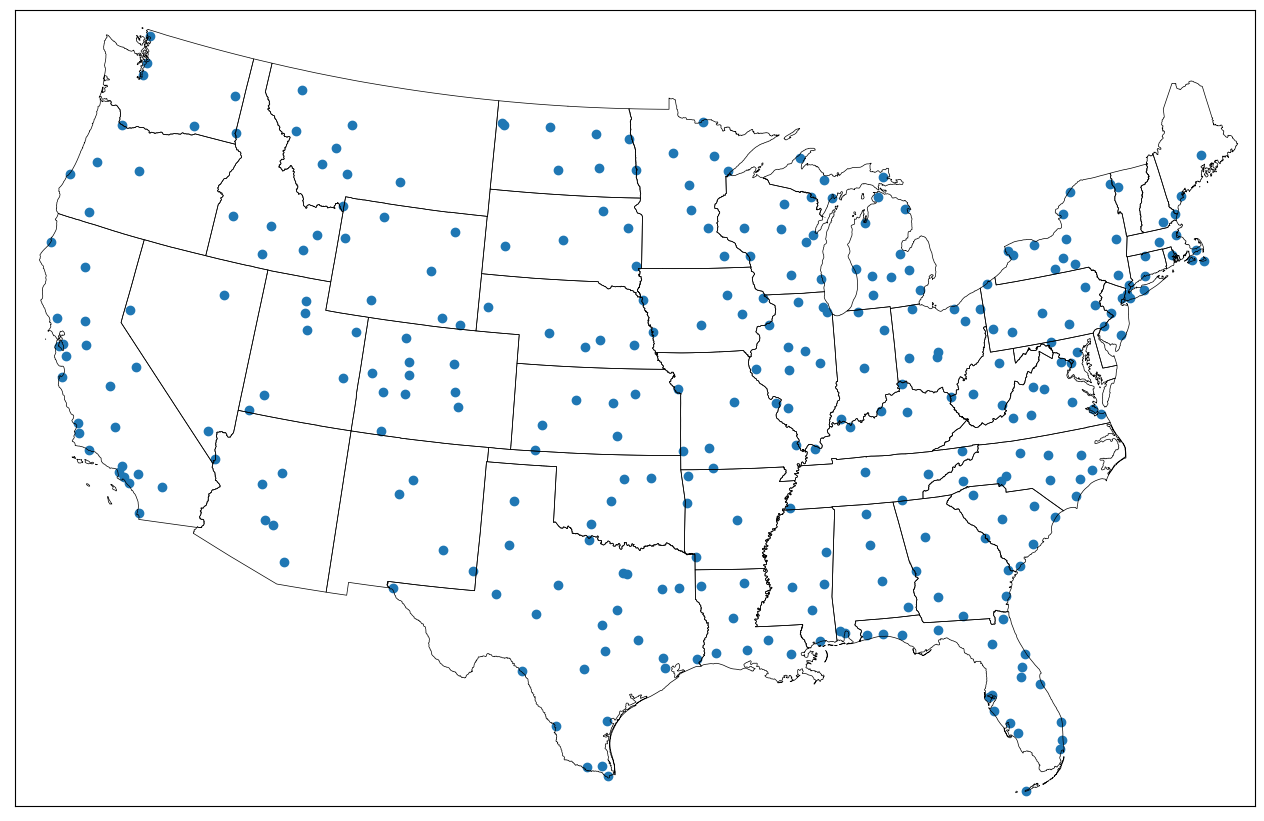

In [6]:
# This code was required due to an Anaconda issue.  You may not need it depending on your environment.
import os
os.environ["PROJ_LIB"] = "C:\\Users\\Nick\\anaconda3\\envs\\sandbox\\Library\\share\\basemap";

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Ready the Basemap for display.
fig = plt.figure(figsize=(16, 16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# Load the shapefile to display the outlines of the US states.
m.readshapefile('st99_d00', name='states', drawbounds=True)

# Plot the airports on the map.
m.scatter(df_airports['long'].values, df_airports['lat'].values, latlon=True)
plt.show()

#### Code Explanation:

Please bear with me on this one as there is a lot of code that requires explanation.  The effort is worthwhile, because you will learn how to display maps and plot points on them using coordinates.

We import the contents of the *airport_coordinates.csv* file by calling the read_csv() method and store it in a DataFrame, named *df_coords*. 

```
df_coords = pd.read_csv('airport_coordinates.csv')
```

We are now going to create a new DataFrame to represent all airports in the dataset and their coordinates.  We subset *df*  to include only the columns for airport and airport name.  By adding a call to the drop_duplicates() function, we are able to create a DataFrame with each airport only occurring once.  Finally, with a call to the reset_index() function we reset the DataFrame index to the original one.

```
df_airports = df[['airport', 'airport_name']].drop_duplicates().reset_index(drop=True)
```

Now, we use the merge() function of pandas to merge the *df_airport* and *df_coords* DataFrames to create our final DataFrame of airports with their respective coordinates.  The first two parameters are the DataFrames that we are merging and the third is the column that is common in both DataFrames - airport, which is the three character designator for the arrival airport.

```
df_airports = pd.merge(df_airports, df_coords, on='airport')
```

The following line of code may or may not be required for you.  I encountered an error when running the *from mpl_toolkits.basemap import Basemap* line of code and the solution was to add the following.

```
import os
os.environ["PROJ_LIB"] = "C:\\Users\\Nick\\anaconda3\\envs\\sandbox\\Library\\share\\basemap";

```

We make the contents of the matplotlib library available to our program. matplotlib is a comprehensive library for creating visualizations in Python.

We then make the mpl_toolkits.basemap library available to our program.  Basemap is a library for plotting 2D data on maps and the one that we will use to plot the map of airports in the dataset.

```
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
```

We specify the size of our map plot as 16 x 16.  Next, we create an instance of the Basemap class, passing a large group of parameters.  The first four (llcrnclon, llcrnrlat, urcrnrlon and urcrnrlat) specify the longitude of lower left hand corner, the latitude of lower left hand corner, the longitude of upper right hand corner and the latitude of upper right hand corner of the plot.  For this project, we are specifying coordinates that give us a map of the United States.  For the project parameter we are passing lcc (Lambert Conformal), which is typically used for aeronautical charts.  The remaining parameters are specific to the selection of lcc.

For a more detailed description of the parameters, please refer to the official [Basemap documentation](https://matplotlib.org/basemap/api/basemap_api.html).

```
fig = plt.figure(figsize=(16, 16))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
```

The above code provides us with the right coordinates on the plot, but does not provide us with the outline of the United States and its states.  We need to utilize shapefiles for this.  The shapefiles required for this project can be found on the [Basemap GitHub repo](https://github.com/matplotlib/basemap/tree/master/examples).  Look for st99_d00.dbf, st99_d00.shp and st99_d00.shx - place these files in the same folder as your other source files.

We call the readshapefile() method on our Basemap object and pass it two parameters.  The first is the name of the shapefile that we downloaded and the second is the name we assign to the attribute to hold the shapefile map points.

```
m.readshapefile('st99_d00', name='states')
```

All that remains now is for us to plot the coordinates on the map, by calling the scatter() method of our Basemap object.  The parameters passed are the longitude and latitude coordinates of the airports in our *df_airports* DataFrame and the latlon parameter equal to True which flags that our coordinates are in degrees.  We specify .values to pass only the values from the DataFrame, thus excluding the indexes.

```
m.scatter(df_airports['long'].values, df_airports['lat'].values, latlon=True)
plt.show()
```

### Step 5. Display the number of diverted flights for each carrier-airport pair.

In [7]:
# Use crosstab to display the number of diverted flights for each carrier-airport pair, without null values.
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')

airport,ABE,ABI,ABQ,ABR,ABY,ACK,ACT,ACV,ACY,ADK,...,VEL,VLD,VPS,WRG,WYS,XNA,XWA,YAK,YNG,YUM
carrier,,,,,,,,,,,,,,,,,,,,,
9E,1.0,,,,3.0,3.0,,,,,...,,2.0,1.0,,,10.0,,,,
AA,,,8.0,,,,,,,,...,,,10.0,,,1.0,,,,
AS,,,0.0,,,,,,,0.0,...,,,,9.0,,,,23.0,,
B6,,,2.0,,,11.0,,,,,...,,,,,,,,,,
DL,3.0,,0.0,,,,,,,,...,,,9.0,,,3.0,,,,
EV,5.0,,3.0,,,,,,,,...,,,7.0,,,9.0,,,,
F9,,,0.0,,,,,,,,...,,,,,,0.0,,,,
G4,9.0,,0.0,,,,,,,,...,,,5.0,,,2.0,,,0.0,
HA,,,,,,,,,,,...,,,,,,,,,,


#### Code Explanation:

Having created an awesome map plot, we will now turn to another powerful pandas function - crosstab.  Cross tabulation is a method to quantitatively analyze the relationship between multiple variables.  In this project we want to determine the number of diverted flights for each carrier-airport pair, for example: how many American Airlines flights scheduled to arrive at JFK airport in New York City were diverted?  Using the crosstab() function of pandas we are able to create a single table that displays this for all carrier-airport pairs in our dataset.

The first paramater that we pass is the carrier column from *df*, which will be the rows in our crosstab.  The second is the airport column, which will be the columns in our crosstab.  The values that we want to display in the crosstab are the number of diverted flights, the arr_diverted column.  With the fourth parameter, we specify that we want to sum the number of diversions for each carrier-airport pair - this is required because each carrier-airport pair appears multiple times in the dataset, once per month.  Finally, we cap off the line of code with a call to the fillna() function to replace NaN values with blanks - this removes noise from the resulting crosstab and eases readability.

Only one line of code, but a very powerful one.

```
pd.crosstab(df['carrier'], df['airport'], values=df['arr_diverted'], aggfunc='sum').fillna('')
```

### Step 6. Display how many arrivals into JFK in 2019 encountered both weather and carrier delays?

In [8]:
# Subset DataFrame for planes arriving into JFK in 2019 with values in both the carrier_ct and weather_ct columns.
df_f = df[(df['date'] >= '2019-01') & (df['date'] <= '2019-12') & (df['airport'] == 'JFK') 
          & (df['carrier_ct'] > 0) & (df['weather_ct'] > 0)]

# Add together the sums of the two columns to obtain the total number of delays.

print("Number of Delays: " + str(df_f['carrier_ct'].sum()  + df_f['weather_ct'].sum()))

Number of Delays: 6919.429999999999


#### Code Explanation:

We used similar code to this in Step 2 above.  We are subsetting *df* to get only those rows representing flights arriving into JFK in 2019 that had both carrier and weather delays.  We store the result as *df_f*.

```
df_f = df[(df['date'] >= '2019-01') & (df['date'] <= '2019-12') & (df['airport'] == 'JFK') 
          & (df['carrier_ct'] > 0) & (df['weather_ct'] > 0)]
```

The total number of delays is the sum of carrier and weather delays, which we print out.  Remember that we need to convert the sums to string before we can print them.

```
print("Number of Delays: " + str(df_f['carrier_ct'].sum()  + df_f['weather_ct'].sum()))
```

### Step 7.	Display the airline with the most flight cancellations as a percentage of total arriving flights.

In [9]:
# Create a DataFrame containing airline names, total arriving flights and number of cancelled flights.
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_flights

,carrier_name,num_arrived
0,Alaska Airlines Inc.,509230.0
1,Allegiant Air,201289.0
2,American Airlines Inc.,1863594.0
3,Delta Air Lines Inc.,1941269.0
4,Endeavor Air Inc.,502948.0
5,Envoy Air,622719.0
6,ExpressJet Airlines Inc.,240320.0
7,ExpressJet Airlines LLC,97099.0
8,Frontier Airlines Inc.,253929.0
9,Hawaiian Airlines Inc.,167614.0


In [10]:
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled

,carrier_name,num_cancelled
0,Alaska Airlines Inc.,5278.0
1,Allegiant Air,1391.0
2,American Airlines Inc.,35096.0
3,Delta Air Lines Inc.,5370.0
4,Endeavor Air Inc.,10605.0
5,Envoy Air,22071.0
6,ExpressJet Airlines Inc.,7589.0
7,ExpressJet Airlines LLC,4163.0
8,Frontier Airlines Inc.,4578.0
9,Hawaiian Airlines Inc.,387.0


In [11]:
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')

In [12]:
# Calculate the percentage of flights cancelled.
df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100

# Display the airline with the most cancellations as a percentage of total arriving flights.
df_cancelled.sort_values(by=['proportion'], ascending=False).head(10)

,carrier_name,num_cancelled,num_arrived,proportion
7,ExpressJet Airlines LLC,4163.0,97099.0,4.287377
5,Envoy Air,22071.0,622719.0,3.544295
12,PSA Airlines Inc.,18692.0,567735.0,3.292381
6,ExpressJet Airlines Inc.,7589.0,240320.0,3.157873
11,Mesa Airlines Inc.,12239.0,443026.0,2.762592
13,Republic Airline,17651.0,642559.0,2.746985
18,Virgin America,433.0,17670.0,2.450481
4,Endeavor Air Inc.,10605.0,502948.0,2.108568
15,Southwest Airlines Co.,51897.0,2716498.0,1.910438
2,American Airlines Inc.,35096.0,1863594.0,1.883243


#### Code Explanation:

To calculate cancellation percentages, we need DataFrames representing both the numerator (cancelled flights) and the denominator (all flights).  We start with the latter: We group the rows in *df* by the carrier name and sum the number of arriving flights for each carrier.  We pass the name parameter of 'num_arrived' to the reset_index() function to name the column containing the sum values.

Then we group the rows in *df* by the carrier name and sum the number of cancelled arrivals for each carrier.  We use reset_index() again.  Finally, we create the *df_cancelled* DataFrame by merging the DataFrame using the common column of 'carrier_name'.

```
df_flights = df.groupby('carrier_name')['arr_flights'].sum().reset_index(name='num_arrived')
df_cancelled = df.groupby('carrier_name')['arr_cancelled'].sum().reset_index(name='num_cancelled')
df_cancelled = pd.merge(df_cancelled, df_flights, on='carrier_name')
```

We can then calculate the percentage of cancelled flights per carrier by dividing the number of cancelled flights by the number of arriving flights for each carrier.

```
df_cancelled['proportion'] = df_cancelled['num_cancelled'] / df_cancelled['num_arrived'] * 100
```

As a final step, we sort the values in descending order by calling the sort_values() function and then using head(1) to display only the carrier with the highest percentage of cancelled flights.

```
df_cancelled.sort_values(by=['proportion'], ascending=False).head(1)
```

### Step 8. Determine the overall average number of delays per airport.

In [13]:
# Calculate the average number of delays per airport.
avg_delays = df.groupby('airport')['arr_del15'].sum().mean()

# Display average number of delays per airport.
print('Average Number of Delays per Airport: ' + str(avg_delays))

Average Number of Delays per Airport: 7544.997245179064


#### Code Explanation:

To calculate the overall average number of delays per airport, we first need to calculate the number of delays per airport and then find the average of those values.  We are able to achieve this in one line of code.  We group the rows in *df* by airport and sum the number of delayed arrivals into each airport.  By adding a call to the mean() function on the end, we calculate the average of the sums.

```
avg_delays = df.groupby('airport')['arr_del15'].sum().mean()
```

We then simply print out the result.

```
print('Average Number of Delays per Airport: ' + str(avg_delays))
```

### Step 9.	Display the three carriers with the lowest number of delayed flights.

In [14]:
df.groupby('carrier')['arr_del15'].sum().nsmallest(3).reset_index(name='num_delays')

,carrier,num_delays
0,VX,3440.0
1,HA,18207.0
2,G4,42725.0


#### Code Explanation:

We group the rows in *df* by carrier and sum the number of delayed arrivals per carrier.  We are only interested in the three carriers with the lowest number of delayed arrivals, so use .nsmallest(3) to give us the three lowest carriers.  For display purposes, we pass the name parameter in our call to reset_index().

```
df.groupby('carrier')['arr_del15'].sum().nsmallest(3).reset_index(name='num_delays')
```

### Step 10. Request that the user input an airline. Then plot the monthly number of national air system (NAS) delay minutes for that airline.  Display whether the trend is increasing or decreasing over the last 2 months.

In [15]:
airline = input("What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? ")

In [16]:
# Subset for carrier selected by user and rows with a NAS delay.
df_nas = df[(df['carrier'] == airline) & (df['nas_delay'] > 0)]

# Determine total number of NAS delay minutes by month.
df_nas = df_nas.groupby('date')['nas_delay'].sum()

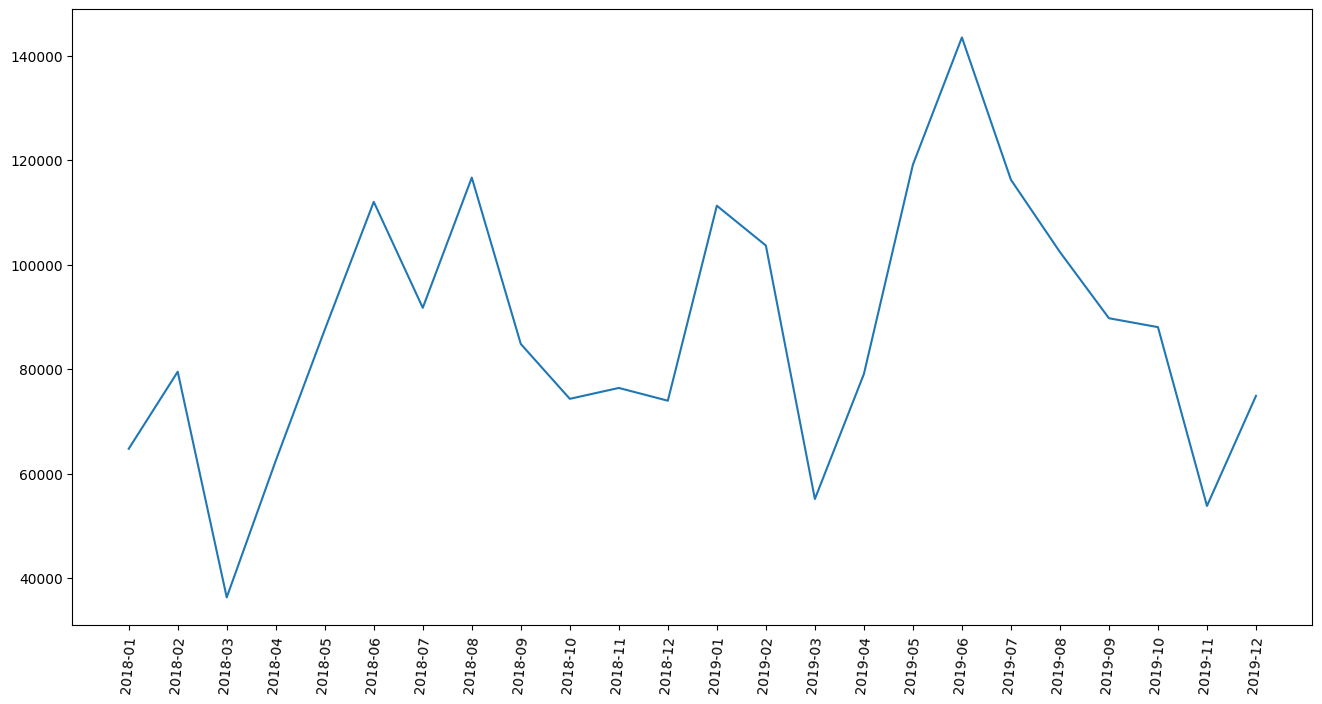

In [17]:
# Plot NAS delay minutes by month for selected airline.
plt.figure(figsize=(16, 8))
plt.plot(df_nas)
plt.xticks(rotation=85)
plt.show()

In [18]:
# Display whether total NAS delay minutes are increasing or decreasing for past 2 months.
if df_nas.iloc[-1] > df_nas.iloc[-2]:
    print('Total NAS delay minutes for ' + airline + ' are increasing.')
else:
    print('Total NAS delay minutes for ' + airline + ' are decreasing.')

Total NAS delay minutes for MQ are increasing.


#### Code Explanation:

We use input() to request the user to input a carrier and save the value in the *airline* variable.  To keep the code simple, we are not performing any validation checks on what the user is inputting and therefore we expect that they will only input a valid value.

```
airline = input("What airline (9E, AA, AS, B6, DL, EV, F9, G4, HA, MQ, NK, OH, OO, UA, VX, WN, YV, YX)? ")
```

We subset *df* according to the carrier input by the user and because we are only interested in national air system (NAS) delays we filter on that too to exclude rows without any NAS delays.  We store the result as *df_nas*.

```
df_nas = df[(df['carrier'] == airline) & (df['nas_delay'] > 0)]
```

We group the rows in *df_nas* by date and sum the number of NAS delays for each month.

```
df_nas = df_nas.groupby('date')['nas_delay'].sum()
```

Now it is time for us to plot the results using matplotlib.  We specify 16 x 8 as the size of the plot, *df_nas* as the data source for the plot and because there are a lot of labels on the x axis, we rotate them 85 degrees to display them neatly without overlap.

```
plt.figure(figsize=(16, 8))
plt.plot(df_nas)
plt.xticks(rotation=85)
plt.show()
```

The final step in the project is to display whether NAS delays are increasing or descreasing in the past two months for the carrier selected by the user.  We can use simple if-else logic to print a statement of either increasing or decreasing.  We utilize iloc integer based indexing to access the last value in *df_nas* (-1) and the second to last value (-2) and compare them.  If the last value is greater than the second to last value, then the delays are increasing, otherwise the delays are decreasing.

```
if df_nas.iloc[-1] > df_nas.iloc[-2]:
    print('Total NAS delay minutes for ' + airline + ' are increasing.')
else:
    print('Total NAS delay minutes for ' + airline + ' are decreasing.')
```